# Analisis de los resultados de las pruebas saber 11 edicion 2018 a traves de tecnicas de mineria de datos

primero se importan las librerias necesarias

### import libs

In [0]:
import pandas as pd
import seaborn as sns; sns.set(style="whitegrid", font_scale=1.5)
import matplotlib.pyplot as plt

### Lectura del Dataset

Luego para la lectura del dataset a traves de la libreria pandas como pd lo podemos leer, ya que en este caso es un .csv se lee con pd.read_csv

Fuera un .json o otro tipo de dataset la sintaxis no es que cambie mucho 

### json       pd.read_json()
### excel      pd.read_excel()
### sql        pd.read_sql()


hay que tener encuenta con que caracter estan separados los datos en este caso es con , y por ello se añade la sintaxis sep=','

low_memory=False    Es un parametro que funciona para la limpieza de los datos

In [0]:
url = 'Saber_11__2018-2.csv'
pruebasSaber11_df = pd.read_csv(url, sep=',', low_memory=False)



a traves de df.head(n) se puede mostrar las primeras filas del dataset


In [4]:
pruebasSaber11_df.head(10)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,...,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,CR,COLOMBIA,M,10/06/2002,20182,SB11201820408513,ESTUDIANTE,COLOMBIA,No,-,-,ATLANTICO,08,SOLEDAD,08758,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,Si,Si,No,Si,No,No,Si,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,1 o 2 veces por semana,Igual,30 minutos o menos,Más de 3 horas,0,No,122432,...,OFICIAL,A,N,ACADÉMICO,108001002924,INST. EDUC. DIST. PARA EL DESARROLLO HUMANO M...,S,URBANO,MAÑANA,8001,BARRANQUILLA,8,ATLANTICO,N,8001,BARRANQUILLA,ATLANTICO,8,63,84,3,69,95,3,54,67,2,57,76,3,65.0,90,A2,305,85,2.0,53.169929,NSE3,PUBLICAR,NO
1,TI,COLOMBIA,M,22/10/2000,20182,SB11201820541500,ESTUDIANTE,COLOMBIA,No,-,-,CORDOBA,23,LORICA,23417,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,Si,No,11 A 25 LIBROS,Nunca o rara vez comemos eso,1 o 2 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,No,28704,...,OFICIAL,A,N,ACADÉMICO,123417001632,IE ANTONIO DE LA TORRE Y MIRANDA,S,URBANO,UNICA,23417,LORICA,23,CORDOBA,N,23417,LORICA,CORDOBA,23,54,54,3,50,48,2,50,53,2,40,28,1,48.0,46,A1,242,46,2.0,45.062853,NSE2,PUBLICAR,GENERACION E - GRATUIDAD
2,TI,COLOMBIA,M,19/12/2001,20182,SB11201820208467,ESTUDIANTE,COLOMBIA,No,-,-,VALLE,76,CALI,76001,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,No sabe,Es vendedor o trabaja en atención al público,No,No,No,No,Si,No,No,No,26 A 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,0,No,112466,...,OFICIAL,A,N,TÉCNICO/ACADÉMICO,276001010994,FRANCISCO JOSE LLOREDA MERA - SEDE PRINCIPAL,S,RURAL,MAÑANA,76001,CALI,76,VALLE,N,76001,CALI,VALLE,76,59,72,3,43,28,2,46,40,2,45,43,2,47.0,42,A-,241,45,2.0,44.806936,NSE2,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,20/10/2000,20182,SB11201820514682,ESTUDIANTE,COLOMBIA,No,-,-,BOYACA,15,TUNJA,15001,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,Si,MÁS DE 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,30 minutos o menos,Más de 3 horas,0,No,134692,...,NO O

### Definicion de variables o categorias 

Con .iloc es posible escoger unicamente las columnas o variables con las que se desea trabajar, haciendo esto a traves de la ubicacion de las variables primeramente seleccionando con : todas las filas y ya luego las columnas. Por ejemplo en este caso la variable ESTU_MCPIO_RESIDE se encuentra en la posicion 13.

In [5]:
pruebasSaber11_df = pruebasSaber11_df.iloc[:, [13,16, 22, 24, 64]]
pruebasSaber11_df.head(10)

,ESTU_MCPIO_RESIDE,FAMI_PERSONASHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PUNT_MATEMATICAS
0,SOLEDAD,7 a 8,Si,No,69
1,LORICA,5 a 6,Si,No,50
2,CALI,1 a 2,No,No,43
3,TUNJA,3 a 4,Si,Si,60
4,BOGOTÁ D.C.,7 a 8,Si,No,51
5,EL LITORAL DEL SAN JUAN,9 o más,-,No,35
6,URIBIA,7 a 8,No,No,49
7,PUERTO COLOMBIA,5 a 6,Si,Si,37
8,MARQUETALIA,5 a 6,No,No,63
9,DUITAMA,3 a 4,No,No,51


### Tipos de registros y valores nulos


In [6]:
assert pruebasSaber11_df.notnull().all().all()
pruebasSaber11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549934 entries, 0 to 549933
Data columns (total 5 columns):
ESTU_MCPIO_RESIDE       549934 non-null object
FAMI_PERSONASHOGAR      549934 non-null object
FAMI_TIENEINTERNET      549934 non-null object
FAMI_TIENECOMPUTADOR    549934 non-null object
PUNT_MATEMATICAS        549934 non-null int64
dtypes: int64(1), object(4)
memory usage: 21.0+ MB


no se encontraron valores nulos en las variables escogidas 


En PUNT_MATEMATICAS tenemos datos de tipo entero 
el resto de los registros son objetos


### Media
Luego de ello se extrae la media a nivel global de la unica varable que tenemos en este caso PUNT_MATEMATICAS de tipo numerico

In [7]:
 pruebasSaber11_df['PUNT_MATEMATICAS'].mean()

50.191430244356596

# Seleccion de renglones

Se puede hacer la seleccion de renglones en los que se encuentre el municipio de Soacha 
A traves de .loc seleccionandolo en este caso por nombre a diferencia de .iloc que es por ubicacion 

In [8]:
pruebasSaber11_df_s = pruebasSaber11_df.set_index("ESTU_MCPIO_RESIDE", inplace=True)
pruebasSaber11_df_s = pruebasSaber11_df.loc['SOACHA']
pruebasSaber11_df_s.head(10)

,FAMI_PERSONASHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,PUNT_MATEMATICAS
ESTU_MCPIO_RESIDE,,,,
SOACHA,5 a 6,Si,No,67
SOACHA,3 a 4,No,No,46
SOACHA,9 o más,Si,Si,55
SOACHA,3 a 4,Si,Si,55
SOACHA,3 a 4,Si,Si,57
SOACHA,5 a 6,Si,Si,61
SOACHA,3 a 4,Si,Si,45
SOACHA,5 a 6,Si,Si,37
SOACHA,3 a 4,Si,Si,42


### Media

Luego de ello se extrae la media a nivel de soacha 

In [9]:
 pruebasSaber11_df_s['PUNT_MATEMATICAS'].mean()

51.16982131039047

Podemos ver una diferencia de un 1.0 entre la media global y la media del municipio de soacha 

In [17]:
pd.value_counts(pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'])

Si    5394
No    1987
-      174
Name: FAMI_TIENECOMPUTADOR, dtype: int64

In [20]:
100 * pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'].value_counts() / len(pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'])

Si    71.396426
No    26.300463
-      2.303111
Name: FAMI_TIENECOMPUTADOR, dtype: float64

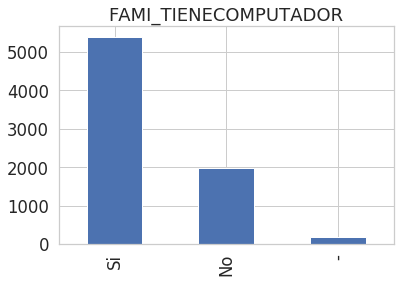

In [21]:
plot = pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'].value_counts().plot(kind='bar',
                                            title='FAMI_TIENECOMPUTADOR')

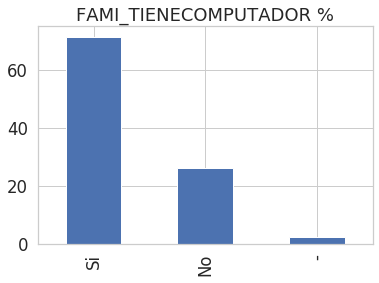

In [28]:
plot = (100 * pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'].value_counts() / len(pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'])).plot(
kind='bar', title='FAMI_TIENECOMPUTADOR %')

In [30]:
pd.crosstab(index=pruebasSaber11_df_s['PUNT_MATEMATICAS'],
            columns=pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'], margins=True)

FAMI_TIENECOMPUTADOR,-,No,Si,All
PUNT_MATEMATICAS,,,,
15,1,0,0,1
20,0,0,1,1
21,0,2,0,2
22,1,4,3,8
23,0,1,5,6
...,...,...,...,...
84,0,2,0,2
85,0,0,1,1
86,0,0,1,1


In [31]:
pd.crosstab(index=pruebasSaber11_df_s['PUNT_MATEMATICAS'], columns=pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'],
            margins=True).apply(lambda r: r/len(pruebasSaber11_df_s) *100,
                                axis=1)

FAMI_TIENECOMPUTADOR,-,No,Si,All
PUNT_MATEMATICAS,,,,
15,0.013236,0.000000,0.000000,0.013236
20,0.000000,0.000000,0.013236,0.013236
21,0.000000,0.026473,0.000000,0.026473
22,0.013236,0.052945,0.039709,0.105890
23,0.000000,0.013236,0.066181,0.079418
...,...,...,...,...
84,0.000000,0.026473,0.000000,0.026473
85,0.000000,0.000000,0.013236,0.013236
86,0.000000,0.000000,0.013236,0.013236


In [33]:
pd.crosstab(index=pruebasSaber11_df_s['PUNT_MATEMATICAS'], columns=pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

FAMI_TIENECOMPUTADOR,-,No,Si
PUNT_MATEMATICAS,,,
15,100.0,0.000000,0.000000
20,0.0,0.000000,100.000000
21,0.0,100.000000,0.000000
22,12.5,50.000000,37.500000
23,0.0,16.666667,83.333333
...,...,...,...
82,0.0,100.000000,0.000000
84,0.0,100.000000,0.000000
85,0.0,0.000000,100.000000


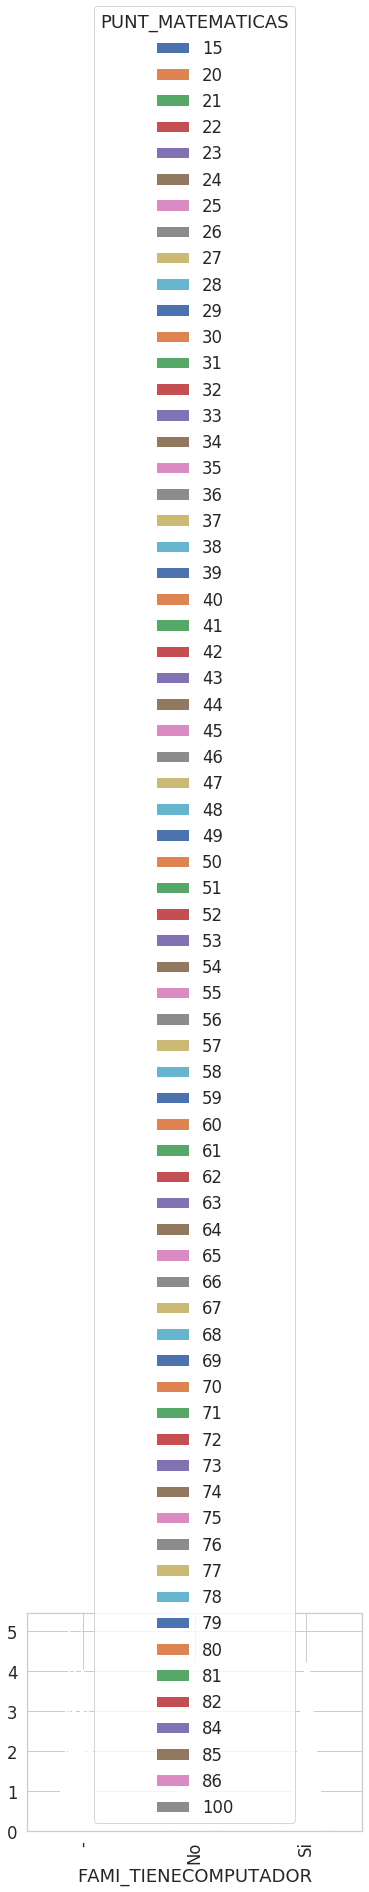

In [35]:
plot = pd.crosstab(index=pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR'],
            columns=pruebasSaber11_df_s['PUNT_MATEMATICAS']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

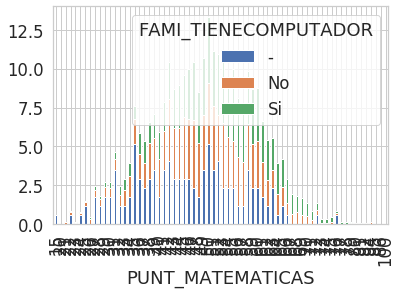

In [36]:
plot = pd.crosstab(index=pruebasSaber11_df_s['PUNT_MATEMATICAS'],
            columns=pruebasSaber11_df_s['FAMI_TIENECOMPUTADOR']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [18]:
pd.value_counts(pruebasSaber11_df_s['FAMI_TIENEINTERNET'])

Si    5643
No    1478
-      434
Name: FAMI_TIENEINTERNET, dtype: int64

In [19]:
pd.value_counts(pruebasSaber11_df_s['FAMI_PERSONASHOGAR'])

3 a 4      3951
5 a 6      2275
1 a 2       548
7 a 8       437
9 o más     176
-           168
Name: FAMI_PERSONASHOGAR, dtype: int64

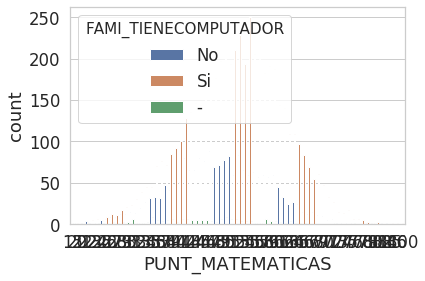

In [14]:
sns.countplot(data=pruebasSaber11_df_s, x="PUNT_MATEMATICAS", hue="FAMI_TIENECOMPUTADOR")
